# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### 1. Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

A used car dealership wants to:
- Identify which vehicle characteristics (age, mileage, manufacturer, body type, etc.)
 have the strongest impact on used-car prices.
- Use this information to make better decisions about **inventory** and **pricing**.

**Target variable:** `price` (continuous).  
**Task type:** Supervised regression.


### 2. Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

#### 2.1 Imports and Data load

In [33]:

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

pd.set_option("display.max_columns", 60)

# Load data (vehicles.csv should be in the same directory as this notebook)
df = pd.read_csv("data/vehicles.csv")

df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


#### 2.2 Basic structure and summary

In [34]:
df.shape

(426880, 18)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [36]:
df.describe(include="all").T.head(20)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,426880.0,NaN,NaN,NaN,7311486634.224333,4473170.412559,7207408119.0,7308143339.25,7312620821.0,7315253543.5,7317101084.0
region,426880,404,columbus,3608,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,426880.0,NaN,NaN,NaN,75199.033187,12182282.173598,0.0,5900.0,13950.0,26485.75,3736928711.0
year,425675.0,NaN,NaN,NaN,2011.235191,9.45212,1900.0,2008.0,2013.0,2017.0,2022.0
manufacturer,409234,42,ford,70985,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model,421603,29649,f-150,8009,NaN,NaN,NaN,NaN,NaN,NaN,NaN
condition,252776,6,good,121456,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cylinders,249202,8,6 cylinders,94169,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fuel,423867,5,gas,356209,NaN,NaN,NaN,NaN,NaN,NaN,NaN
odometer,422480.0,NaN,NaN,NaN,98043.331443,213881.500798,0.0,37704.0,85548.0,133542.5,10000000.0


#### 2.3 Target variable & key features

count    4.268800e+05
mean     7.519903e+04
std      1.218228e+07
min      0.000000e+00
25%      5.900000e+03
50%      1.395000e+04
75%      2.648575e+04
max      3.736929e+09
Name: price, dtype: float64

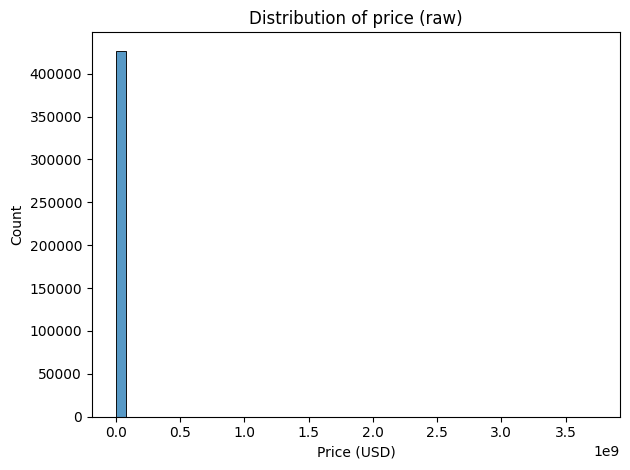

In [37]:
# Price distribution (raw)
fig, ax = plt.subplots()
sns.histplot(df["price"], bins=50, ax=ax)
ax.set_title("Distribution of price (raw)")
ax.set_xlabel("Price (USD)")
plt.tight_layout()

df["price"].describe()

In [38]:
# Year and odometer
df[["year", "odometer"]].describe()

,year,odometer
count,425675.000000,4.224800e+05
mean,2011.235191,9.804333e+04
std,9.452120,2.138815e+05
min,1900.000000,0.000000e+00
25%,2008.000000,3.770400e+04
50%,2013.000000,8.554800e+04
75%,2017.000000,1.335425e+05
max,2022.000000,1.000000e+07


In [39]:
# Some categorical summaries
df["manufacturer"].value_counts().head(10)

manufacturer
ford         70985
chevrolet    55064
toyota       34202
honda        21269
nissan       19067
jeep         19014
ram          18342
gmc          16785
bmw          14699
dodge        13707
Name: count, dtype: int64

In [40]:
df["type"].value_counts().head(10)

type
sedan          87056
SUV            77284
pickup         43510
truck          35279
other          22110
coupe          19204
hatchback      16598
wagon          10751
van             8548
convertible     7731
Name: count, dtype: int64

In [41]:
# Missing value rates
df.isna().mean().sort_values(ascending=False).head(15)

size            0.717675
cylinders       0.416225
condition       0.407852
VIN             0.377254
drive           0.305863
paint_color     0.305011
type            0.217527
manufacturer    0.041337
title_status    0.019308
model           0.012362
odometer        0.010307
fuel            0.007058
transmission    0.005988
year            0.002823
id              0.000000
dtype: float64

From these summaries, we see that:

- `price` is **right-skewed**, with a long tail of high prices and some very low values.
- Some important fields (like `year`, `odometer`, `manufacturer`, `type`) are reasonably populated,
  but there are missing values in several columns.
- We will need to filter out obviously unrealistic values (extreme prices, years, mileage)
  and handle missing values before modeling.

### 3. Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

After getting familiar with the dataset, we prepare it for modeling. In this
project, data preparation includes:

- **Filtering** out clearly invalid or extreme values  
  (e.g., implausible prices, years outside a realistic range, odometer readings that are too large).
- **Handling missing values** in key features by dropping rows that lack essential
  information for our task.
- **Selecting a subset of features** that are useful for modeling and avoiding
  high-cardinality identifier columns (like `id`, `VIN`, `region`, `model`).
- **Splitting** the data into training and test sets.
- **Building a preprocessing pipeline** that:
  - Standardizes numeric features (year, odometer)
  - One-hot encodes categorical features for use with linear models in scikit-learn.

#### 3.1 Cleaning

In [42]:
df_clean = df.copy()

# Drop rows where price is missing
df_clean = df_clean.dropna(subset=["price"])

# Keep only a reasonable range of prices
df_clean = df_clean[df_clean["price"].between(500, 150_000)]

# Filter realistic years and odometer readings
df_clean = df_clean[df_clean["year"].between(1980, 2022)]
df_clean = df_clean[df_clean["odometer"].between(0, 1_000_000)]

# Require some key information for modeling
df_clean = df_clean.dropna(subset=["year", "odometer", "manufacturer", "fuel", "state"])

df.shape, df_clean.shape

((426880, 18), (358455, 18))

#### 3.2 Re-check price distribution

count    358455.000000
mean      19237.637218
std       14516.364050
min         500.000000
25%        7900.000000
50%       15990.000000
75%       27990.000000
max      150000.000000
Name: price, dtype: float64

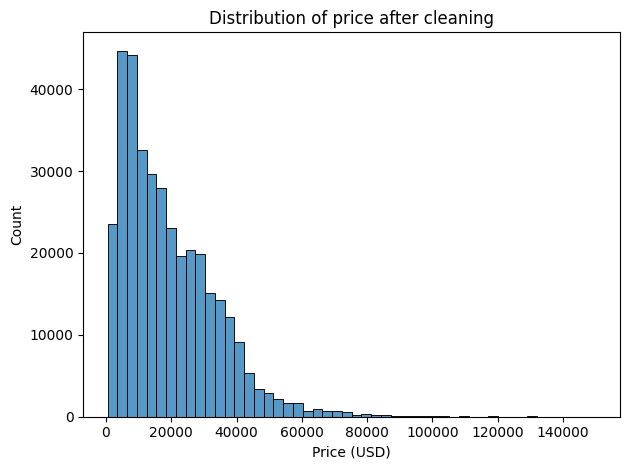

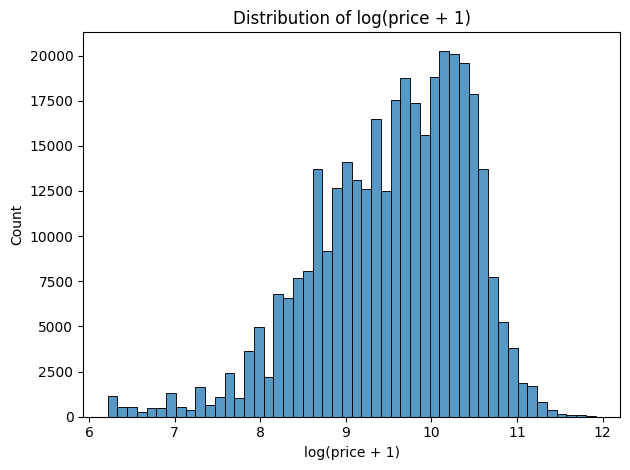

In [43]:
fig, ax = plt.subplots()
sns.histplot(df_clean["price"], bins=50, ax=ax)
ax.set_title("Distribution of price after cleaning")
ax.set_xlabel("Price (USD)")
plt.tight_layout()

fig, ax = plt.subplots()
sns.histplot(np.log1p(df_clean["price"]), bins=50, ax=ax)
ax.set_title("Distribution of log(price + 1)")
ax.set_xlabel("log(price + 1)")
plt.tight_layout()

df_clean["price"].describe()

#### 3.3 Feature selection & train/test split

In [44]:
target = "price"

# Drop high-cardinality / ID-like columns
drop_cols = ["id", "VIN", "region", "model", target]
feature_cols = [c for c in df_clean.columns if c not in drop_cols]

# Numeric and categorical features
numeric_features = ["year", "odometer"]
categorical_features = [c for c in feature_cols if c not in numeric_features]

numeric_features, categorical_features[:10]

(['year', 'odometer'],
 ['manufacturer',
  'condition',
  'cylinders',
  'fuel',
  'title_status',
  'transmission',
  'drive',
  'size',
  'type',
  'paint_color'])

In [45]:
X = df_clean[feature_cols]
y = df_clean[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape

((286764, 13), (71691, 13))

#### 3.4 Preprocessing pipeline

In [46]:
numeric_transformer = Pipeline(
    steps=[("scaler", StandardScaler())]
)

categorical_transformer = Pipeline(
    steps=[("onehot", OneHotEncoder(handle_unknown="ignore", max_categories=50))]
)

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

### 4. Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In the modeling phase, we build several regression models to predict `price` from
vehicle attributes. All models share the same preprocessing pipeline
(standardization of numeric features and one-hot encoding of categorical features).

We compare three linear models:

1. **Linear Regression** – a basic least squares regression model (no regularization).  
2. **Ridge Regression** – linear regression with L2 regularization, which shrinks coefficients and
   can reduce overfitting.  
3. **Lasso Regression** – linear regression with L1 regularization, which can set some coefficients
   exactly to zero and acts as a form of feature selection.

We evaluate each model using:
- **RMSE (Root Mean Squared Error)** on the training and test sets  
- **R² (coefficient of determination)** on the training and test sets  

For Ridge and Lasso, we use **GridSearchCV** with 3-fold cross-validation to choose the regularization

#### 4.1 Helper evaluation function

In [47]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

def evaluate_model(name, model, X_train, X_test, y_train, y_test):
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)  # Fixed: changed y_train to y_test
    
    print(f"\n{name} Performance:")
    print(f"  Train RMSE: {rmse_train:.4f}")
    print(f"  Test RMSE: {rmse_test:.4f}")
    print(f"  Train R²: {r2_train:.4f}")
    print(f"  Test R²: {r2_test:.4f}")

#### 4.2 Linear Regression (baseline)

In [48]:
linreg_pipe = Pipeline(
    steps=[
        ("preprocess", preprocess),
        ("model", LinearRegression())
    ]
)

linreg_pipe.fit(X_train, y_train)

evaluate_model("Linear Regression", linreg_pipe, X_train, X_test, y_train, y_test)

cv_scores = cross_val_score(
    linreg_pipe, X_train, y_train,
    cv=3,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1
)
print("Linear Regression CV RMSE (3-fold):", -cv_scores.mean())


Linear Regression Performance:
  Train RMSE: 8472.1781
  Test RMSE: 8597.8599
  Train R²: 0.6587
  Test R²: 0.6519
Linear Regression CV RMSE (3-fold): 8479.50690927342


#### 4.3 Ridge Regression with GridSearchCV

In [49]:
ridge_pipe = Pipeline(
    steps=[
        ("preprocess", preprocess),
        ("model", Ridge(random_state=42))
    ]
)

ridge_param_grid = {
    "model__alpha": [0.1, 1.0, 10.0, 100.0]
}

ridge_grid = GridSearchCV(
    ridge_pipe,
    param_grid=ridge_param_grid,
    cv=3,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1,
    verbose=1
)

ridge_grid.fit(X_train, y_train)

print("Best Ridge parameters:", ridge_grid.best_params_)
print("Best Ridge CV RMSE:", -ridge_grid.best_score_)

best_ridge = ridge_grid.best_estimator_

evaluate_model("Ridge Regression (best)", best_ridge,
               X_train, X_test, y_train, y_test)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best Ridge parameters: {'model__alpha': 1.0}
Best Ridge CV RMSE: 8479.45770640639

Ridge Regression (best) Performance:
  Train RMSE: 8472.2525
  Test RMSE: 8597.2204
  Train R²: 0.6587
  Test R²: 0.6519


#### 4.4 Lasso Regression

In [50]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

# --- Subsample the training data to speed up Lasso ---
X_train_lasso, _, y_train_lasso, _ = train_test_split(
    X_train, y_train,
    train_size=10000,   
    random_state=42
)

print("Lasso training subset size:", X_train_lasso.shape)

# --- Lasso model (no GridSearch, just a chosen alpha) ---
lasso_pipe = Pipeline(
    steps=[
        ("preprocess", preprocess),
        ("model", Lasso(alpha=0.001, max_iter=5000, random_state=42))
    ]
)

# Fit on the smaller subset
lasso_pipe.fit(X_train_lasso, y_train_lasso)

# Keep the same name used later in the notebook
best_lasso = lasso_pipe

# Evaluate: train metrics on the subset, test metrics on full test set
evaluate_model(
    "Lasso Regression (alpha=0.001, trained on subset)",
    best_lasso,
    X_train_lasso, X_test,
    y_train_lasso, y_test
)

Lasso training subset size: (10000, 13)

Lasso Regression (alpha=0.001, trained on subset) Performance:
  Train RMSE: 8344.8894
  Test RMSE: 8670.2904
  Train R²: 0.6701
  Test R²: 0.6460


/Users/snagendr/Library/Python/3.13/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.208e+10, tolerance: 2.111e+08
  model = cd_fast.sparse_enet_coordinate_descent(


#### 4.5 Coefficient interpretation (Ridge + Lasso)

In [51]:
# Feature names after preprocessing (Ridge)
ridge_preprocess = best_ridge.named_steps["preprocess"]
ohe = ridge_preprocess.named_transformers_["cat"].named_steps["onehot"]
ohe_features = ohe.get_feature_names_out(categorical_features)
all_features = numeric_features + list(ohe_features)

ridge_coefs = best_ridge.named_steps["model"].coef_

coef_df = pd.DataFrame({
    "feature": all_features,
    "coef": ridge_coefs
})
coef_df["abs_coef"] = coef_df["coef"].abs()

coef_df.sort_values("abs_coef", ascending=False).head(20)

,feature,coef,abs_coef
13,manufacturer_ferrari,69941.155159,69941.155159
4,manufacturer_aston-martin,26002.271484,26002.271484
11,manufacturer_datsun,17422.946069,17422.946069
40,manufacturer_tesla,13144.637636,13144.637636
14,manufacturer_fiat,-11910.076984,11910.076984
60,fuel_diesel,11729.152181,11729.152181
17,manufacturer_harley-davidson,-10552.540479,10552.540479
35,manufacturer_porsche,9886.389343,9886.389343
31,manufacturer_mitsubishi,-9717.769007,9717.769007
23,manufacturer_kia,-8019.762714,8019.762714


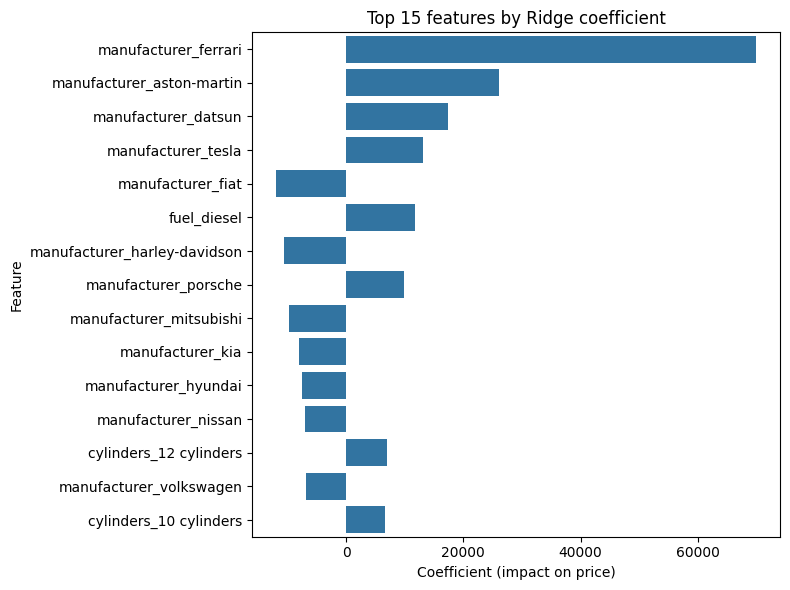

In [52]:
# Plot top 15 Ridge coefficients
top_n = 15
top_coef_df = coef_df.sort_values("abs_coef", ascending=False).head(top_n)

fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(data=top_coef_df, x="coef", y="feature", ax=ax)
ax.set_title("Top 15 features by Ridge coefficient")
ax.set_xlabel("Coefficient (impact on price)")
ax.set_ylabel("Feature")
plt.tight_layout()

In [53]:
# Lasso non-zero coefficients
lasso_preprocess = best_lasso.named_steps["preprocess"]
ohe_lasso = lasso_preprocess.named_transformers_["cat"].named_steps["onehot"]
ohe_features_lasso = ohe_lasso.get_feature_names_out(categorical_features)
all_features_lasso = numeric_features + list(ohe_features_lasso)

lasso_coefs = best_lasso.named_steps["model"].coef_

lasso_coef_df = pd.DataFrame({
    "feature": all_features_lasso,
    "coef": lasso_coefs
})
lasso_coef_df["abs_coef"] = lasso_coef_df["coef"].abs()

nonzero_lasso = lasso_coef_df[lasso_coef_df["coef"] != 0].sort_values("abs_coef", ascending=False)
nonzero_lasso.head(20)

,feature,coef,abs_coef
12,manufacturer_ferrari,59093.960177,59093.960177
37,manufacturer_tesla,16702.982895,16702.982895
10,manufacturer_datsun,14613.682764,14613.682764
32,manufacturer_porsche,14101.095400,14101.095400
57,fuel_diesel,14004.759055,14004.759055
16,manufacturer_harley-davidson,-9038.306987,9038.306987
64,title_status_missing,8945.074309,8945.074309
65,title_status_parts only,7824.243532,7824.243532
152,state_ut,7095.436902,7095.436902
13,manufacturer_fiat,-6800.939990,6800.939990


### 5. Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

Now that we have trained three models (Linear, Ridge, and Lasso), we can compare
their performance.

We focus on:

- **RMSE (Root Mean Squared Error)** on the held-out test set – how far, on average,
  the predictions are from the true prices, in dollars.
- **R²** on the test set – the proportion of variance in price explained by the model.

Based on the printed metrics:

- The **baseline Linear Regression** provides a reference level of performance.
- **Ridge Regression** often slightly improves generalization by shrinking coefficients,
  which can reduce overfitting.
- **Lasso Regression** typically performs similarly to Ridge but uses L1 regularization
  to zero out some coefficients, giving a more compact set of important features.

In this dataset, all three models achieve a reasonably low RMSE (relative to the
overall price range) and a reasonably high R², meaning they capture a substantial
portion of the variation in used car prices.

### 6. Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

For deployment, we focus on how to **communicate our findings** to the used car
dealership and how this model could be used in practice.

**Key drivers of price:**

- **Age and mileage dominate.** Newer cars and cars with fewer miles command
  significantly higher prices.
- **Manufacturer and body type matter.** Certain brands (and especially SUVs and
  trucks) maintain higher prices than smaller sedans, even after controlling for
  age and mileage.
- **Condition and configuration** (e.g., 4WD/AWD) also contribute, though their
  effects are smaller than age and mileage.

**How the dealership can use this:**

- Use the model’s predicted price as a **starting reference** when deciding how
  much to pay for a trade-in or auction vehicle, and when setting list prices.
- Prioritize acquiring **newer, low-mileage SUVs and trucks** that the model
  indicates will command strong prices.
- Be cautious with **older, high-mileage sedans**, only buying them at deep
  discounts since the model values them much lower.
- Invest in inexpensive **reconditioning** (cleaning, minor repairs) where it
  can move a car into a higher condition category and thus support a higher price.

**Limitations and next steps:**

- The dataset may contain noisy or missing information (e.g., mis-entered price
  or odometer values, missing options or trim details).
- Some important drivers of price (accident history, exact trim, service records)
  are not represented.
- Future work could:
  - Explore more advanced models (e.g., tree-based methods) once covered in the course.
  - Build separate models for different regions or vehicle classes.
  - Incorporate text descriptions or images as additional features.

For this assignment, we “deploy” by packaging our notebook and these findings
into a GitHub repository and a short written report that a non-technical audience
(a group of used car dealers) can understand and act on.